# Twitter API Configuration

In [194]:
import requests
import os
import json

In [195]:
bearer_token = os.environ['BEARER_TOKEN']

def create_url():
    tweet_fields = "tweet.fields=source,lang,created_at,public_metrics,context_annotations"
    ids = "ids=1278747501642657792,1255542774432063488"
    url = "https://api.twitter.com/2/tweets?{}&{}".format(ids, tweet_fields)
    return url


def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2TweetLookupPython"
    return r


def connect_to_endpoint(url):
    response = requests.request("GET", url, auth=bearer_oauth)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()

# def main():
#     url = create_url()
#     json_response = connect_to_endpoint(url)
#     print(json.dumps(json_response, indent=4, sort_keys=True))

# Importing Research Data

In [196]:
#Data sourced from: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0182487
df = pd.read_excel('pone.0182487.s003.xlsx')

# Preprocessing

In [197]:
df.head()

,S1 Table - Tweet data and labels,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,We have used the data according to the Twitter...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Tweet id,Label,NaN,NaN
4,732113301144883204,0,NaN,NaN


In [198]:
df = df.drop([0,1,2,3])
df = df.drop(['Unnamed: 2','Unnamed: 3'], axis=1)
df = df.set_axis(['id', 'spam'], axis='columns')
df.head()

,id,spam
4,732113301144883204,0
5,732113301182746624,0
6,732113301145014272,0
7,732113301149089794,0
8,732113301178552320,0


In [210]:
print('Missing Values:\n')
print(df.isna().sum())

Missing Values:

id      0
spam    0
dtype: int64


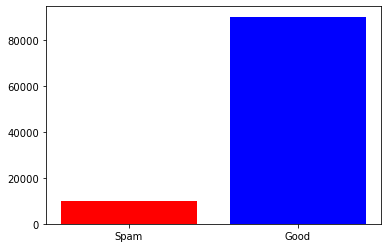

Spam Count: 9945
Good Count: 90055
Spam to Good Ratio: 0.09945


In [206]:
spamCount = df[df['spam']==1].shape[0]
goodCount = df[df['spam']==0].shape[0]

plt.bar(['Spam', 'Good'], [spamCount, goodCount], color=['red', 'blue'])
plt.show()

print('Spam Count:', spamCount)
print('Good Count:', goodCount)
print('Spam to Good Ratio:', spamCount/(spamCount+goodCount))

0
1


In [219]:
# for i in df['id']:
#     print(i)

732113301144883204
732113301182746624
732113301145014272
732113301149089794
732113301178552320
732113301166039040
732113305372762113
732113305376940032
732113305347612672
732113305364508672
732113305343401984
732113305343426560
732113305347706880
732113305355976704
732113309571284993
732113309567062016
732113309533511680
732113309558841344
732113309554593792
732113309563006976
732113309550383104
732113309533650944
732113309567193088
732113309546237952
732113313757175808
732113313727938560
732113313727909888
732113313736347649
732113313748803584
732113313761480704
732113317934686208
732113317947269121
732113317926469633
732113317922119681
732113317943107584
732113317926469632
732113317939019777
732113317955768320
732113317943255041
732113322124795906
732113322137534468
732113322116517889
732113322150100994
732113322133323776
732113322154328064
732113322137559040
732113322150100993
732113322133327872
732113326310854656
732113326340251648
732113326327631872
732113330542804993
732113330534

732567733032898560
732567733011898369
732567733020307456
732567733020282880
732567733024493568
732567733037113345
732567733020266496
732567733045493760
732567733045432320
732567733032910849
732567733049667584
732567733016092672
732567737222844416
732567737243815937
732567737235472384
732567737214492673
732567737235591168
732567737218781184
732567737218813952
732567737218830336
732567737218695169
732567737222864897
732567737235439617
732567737235431424
732567737243971584
732567737222848512
732567737214636032
732567741404610561
732567741404565505
732567741404602368
732567741429768196
732567741434073092
732567741425700864
732567741429907456
732567741404745728
732567741434105857
732567741413097472
732567741438300160
732567741438275584
732567741421522946
732567741438124032
732567745632436225
732567745619841024
732567745598869508
732567745615646726
732567745611456512
732567745615761408
732567745603084288
732567745594818565
732567745615777792
732567745615650816
732567745615810561
732567745619

732568513173315585
732568513186037760
732568513177657344
732568513185898497
732568513169240064
732568513169227776
732568513173393408
732568513177587712
732568513173422080
732568513156677632
732568513152487425
732568513160695809
732568513185878016
732568517350805506
732568517371789312
732568517375971329
732568517363552256
732568517367603200
732568517346742274
732568517346775040
732568517367758848
732568517376102400
732568517355175936
732568517371908096
732568517384544257
732568517346656260
732568517371793411
732568521570275329
732568521574506496
732568521561907201
732568521545129985
732568521562034176
732568521574481920
732568521578795008
732568521574625281
732568521553534976
732568521557835777
732568521553633281
732568521562017792
732568521574600704
732568521561886720
732568521578713089
732568521578811400
732568521561899008
732568525752008704
732568525747814402
732568525739597825
732568525743607809
732568525768929280
732568525764710400
732568525768794113
732568525735399424
732568525764

732570090235797504
732570090244177920
732570090210627584
732570090219134977
732570090223210496
732570090227388416
732570090240114688
732570090231619585
732570090227433473
732570090231619584
732570090235924481
732570090235912193
732570090248474625
732570090219134976
732570090231746561
732570090214936576
732570090248536064
732570090227437568
732570094409129984
732570094434312192
732570094434320384
732570094413303808
732570094409256961
732570094442807297
732570094413352961
732570094434422784
732570094442684421
732570094442827777
732570094421856256
732570094413340672
732570094421712897
732570094438490113
732570094409265153
732570098624434176
732570098607628288
732570098607611905
732570098628591618
732570098611945472
732570098616131584
732570098611806208
732570098637082624
732570098624569348
732570098599403520
732570098616160257
732570098599223296
732570098628591616
732570098628579330
732570098637148160
732570098624499712
732570098616180737
732570098632818689
732570098624565252
732570098616

732571692455747584
732571692451700736
732571692455874561
732571692434788352
732571692447436800
732571692434919425
732571692434788353
732571692447477761
732571696662642689
732571696654254082
732571696637566976
732571696633384961
732571696662642688
732571696650190850
732571696666968065
732571696662728704
732571696645935105
732571696633413632
732571696641773570
732571696629157888
732571700844363776
732571700827725824
732571700827586561
732571700852854784
732571700857036800
732571700844474368
732571700823461888
732571700823363586
732571700840128514
732571700840239108
732571700823523328
732571700848517120
732571700848689152
732571700857065472
732571700852891648
732571700844453888
732571700852887552
732571705026088960
732571705038639104
732571705051226113
732571705055449089
732571705038753792
732571705034473472
732571705026174977
732571705038753793
732571705026084864
732571705042853889
732571705030410240
732571705038778368
732571705030397952
732571705055514624
732571705055547396
732571705055

732573181442035713
732573181450543105
732573181425422336
732573181442162688
732573181433630720
732573185607000065
732573185619582976
732573185627938816
732573185640566785
732573185644843009
732573185640521730
732573185644888064
732573185615482880
732573185623904256
732573185619681280
732573185628049408
732573185632292865
732573185611333632
732573185619689472
732573185636438016
732573185644728320
732573185611300864
732573185644859392
732573189801283585
732573189813862401
732573189839020032
732573189830631424
732573189822255104
732573189826478087
732573189818089472
732573189805596672
732573189834870784
732573189830762496
732573189814030337
732573189826478081
732573189822287873
732573189826469888
732573194020782080
732573194003980288
732573194016542720
732573193999785986
732573193999765506
732573194012348416
732573194008317952
732573194020917249
732573194033455105
732573193995575296
732573193995718656
732573193999941632
732573194008268800
732573194029146116
732573194029260800
732573193995

732574657820266498
732574657807687680
732574657820385280
732574657820385281
732574657845559296
732574657841356800
732574657807716352
732574657828818944
732574657837039617
732574657820266496
732574657845559297
732574657820299266
732574657837174784
732574657837211648
732574657828802560
732574657816076288
732574657816104961
732574657811906560
732574657845428224
732574662039740417
732574662027182082
732574662035537920
732574662002114560
732574662006202368
732574662027284480
732574662018924544
732574662031466496
732574662023086081
732574662010408960
732574662035673089
732574662031474689
732574662014603264
732574662010535936
732574662018879488
732574662035709952
732574662018912256
732574662006329344
732574662001991684
732574662002020353
732574662023073792
732574662002151424
732574662031511553
732574666196295681
732574666213072898
732574666225684480
732574666213064704
732574666196455425
732574666200584193
732574666221445120
732574666196410368
732574666225799168
732574666196451328
732574666208

732576268420558848
732576272618938368
732576272639885312
732576272623095808
732576272652476416
732576272635793408
732576272619016193
732576272627470336
732576272640028673
732576272640036864
732576272644247552
732576272619044864
732576276842577925
732576276821643267
732576276821741568
732576276846915586
732576276838375424
732576276830126080
732576276830003204
732576276834226177
732576276842700802
732576276817555456
732576276838535168
732576276809048064
732576276829982723
732576276842700800
732576276813361156
732576276838535169
732576276817448964
732576276846944257
732576281032712192
732576281028517888
732576281036869632
732576281028624384
732576281032830976
732576276817514496
732576281037045760
732576281003327489
732576281028530176
732576281020137472
732576281020223489
732576281032790016
732576281011847172
732576285235367938
732576285197656065
732576285201817600
732576285235384320
732576285235372032
732576285214400515
732576285231353861
732576285201960960
732576285214560257
732576285231

732577950353129472
732577950349066240
732577950344871936
732577950374092801
732577954555826177
732577954547404801
732577954555961344
732577954543308800
732577954560155653
732577954568409089
732577954555908097
732577954555940864
732577954530787328
732577954534842372
732577954560147456
732577954543349760
732577954568376320
732577954564300800
732577958733352961
732577958729158657
732577958758469633
732577958741741569
732577958741741568
732577958741848064
732577958750081024
732577958725029888
732577958746071040
732577958758617089
732577958746071045
732577958733451268
732577958729129988
732577958741835776
732577958762795008
732577958729293824
732577962927722496
732577962948763648
732577962927607808
732577962944528384
732577962927788032
732577962944548866
732577962923593728
732577962936000512
732577962956972032
732577962919399424
732577962948763653
732577962927611904
732577962927763456
732577962927722498
732577962923544576
732577962936176641
732577962957144064
732577962936160256
732577967117

732579485451608065
732579485451591680
732579485476921344
732579485455949824
732579485485268992
732579489654308864
732579489650081792
732579489683623936
732579489662656516
732579489679441920
732579489679450113
732579489650225152
732579489650204673
732579489662816256
732579489667002368
732579489662828545
732579489650253824
732579489658503168
732579489675350016
732579493840224257
732579493877964800
732579493857112064
732579493861298176
732579493877972993
732579493840322560
732579493861199872
732579493865480192
732579493844557825
732579493878071296
732579493865521152
732579493869551617
732579493873876992
732579493873750016
732579493878063104
732579493865529344
732579493848567808
732579493857140736
732579498068054016
732579498055610369
732579498038693888
732579498038857731
732579498051305473
732579498047209472
732579498047070208
732579498072346628
732579498042871809
732579498038808576
732579498059661313
732579498068168708
732579502241374208
732579502228807680
732579502233018368
732579502262

732581054142369793
732581054142414852
732581054138064900
732581054129819649
732581054150770688
732581054121304064
732581054159192065
732581054150676482
732581054150774784
732581054146588672
732581054146478080
732581054154870785
732581054142373888
732581054159036416
732581054159060992
732581054138056705
732581058353340417
732581058319949824
732581058349281280
732581058324094978
732581058315751424
732581058319908868
732581058345086976
732581058340892672
732581058349289472
732581058336706560
732581058315706368
732581058353451008
732581058324004864
732581058349268992
732581058349137922
732581062522478593
732581062535077888
732581062518263809
732581062522634240
732581062510055424
732581062539235328
732581062510051329
732581062539415553
732581062547738624
732581062518444032
732581062547779584
732581062526652416
732581062522601472
732581062518398976
732581062510051328
732581062510051330
732581062530977792
732581062518394882
732581066704199680
732581066716762112
732581066729365505
732581066712

732582601832173568
732582601844613120
732582601848807424
732582601844621313
732582601844613122
732582601836363776
732582601844785153
732582601853132801
732582601857208320
732582601836240896
732582606026346496
732582606034718720
732582606022172672
732582606043144192
732582606026375170
732582606030561282
732582606018084864
732582606034763776
732582606034718721
732582606034722817
732582606013923328
732582606034874368
732582606013923329
732582606030655488
732582606051676160
732582606043262976
732582606034739200
732582610245849089
732582610237460486
732582610216443905
732582610216452096
732582610212360192
732582610224848898
732582610233253892
732582610233217024
732582610237460485
732582610237575168
732582610233393152
732582610237587457
732582610241622016
732582610208235522
732582610245844993
732582610212380672
732582610237415424
732582610225008643
732582610216583168
732582610212282368
732582610237587456
732582614431760384
732582614423343105
732582614410747905
732582614406725634
732582614431

732584166294839296
732584170514341890
732584170514350080
732584170497576960
732584170514341888
732584170489253889
732584170501865472
732584170489253888
732584170518642689
732584170514489344
732584170527068160
732584170506031104
732584170527019008
732584170510225408
732584170510295040
732584170501857280
732584170518511618
732584170527023105
732584170518544384
732584170527043586
732584170526887936
732584174691844096
732584174700265472
732584174691868676
732584174704427008
732584174691848192
732584174712938496
732584174683488256
732584174700367872
732584174721347589
732584174700404736
732584174687637504
732584174696202241
732584174700396544
732584174704463872
732584174700400640
732584174704594944
732584178911338496
732584178881961984
732584178911449088
732584178898722818
732584178898853888
732584178898866177
732584178877882368
732584178886279168
732584178894561280
732584178911477764
732584178907242496
732584178903076864
732584178903093248
732584178894536708
732584178882105344
732584178898

732585755944595456
732585755969769472
732585755961262081
732585755973943296
732585755957186560
732585755948810240
732585755965591552
732585755952959488
732585755965456385
732585755940388864
732585755948638208
732585760147136513
732585760155537413
732585760147169280
732585760147136514
732585760134705152
732585760130510848
732585760147267588
732585760159830016
732585760142954498
732585760130502656
732585760163954689
732585760151461889
732585760163913728
732585760168235010
732585760155656198
732585764354162688
732585764349968384
732585764329033728
732585764329029632
732585764354162689
732585764354064384
732585764350009344
732585764362539008
732585764337278977
732585768539979776
732585768518975488
732585768527388673
732585768556896256
732585768523333632
732585768519098372
732585768544178176
732585768523206656
732585768548438019
732585768556847104
732585768523202560
732585768523292672
732585768527482880
732585768535777280
732585768556892160
732585772721676288
732585772734275584
732585772730

732587177805156352
732587177834622980
732587177813499905
732587177826258944
732587177842900994
732587177805271040
732587177809321985
732587177826127873
732587177805291520
732587177813639168
732587177843040256
732587177834631168
732587177822068737
732587182012039168
732587182012006401
732587182028775424
732587182016192514
732587182016319489
732587182020517888
732587181999460354
732587182033149952
732587182007836672
732587181999566849
732587182003761153
732587182024757248
732587182028914688
732587182028820480
732587182016352257
732587186193764352
732587186227273729
732587186206445568
732587186223218688
732587186214871040
732587186219036672
732587186202247168
732587186197925888
732587186206310400
732587186219028481
732587186202279936
732587186227445761
732587190400638977
732587190425780224
732587190421585920
732587190392229889
732587190417416194
732587190421716992
732587190392217600
732587190388068353
732587190392360961
732587190421749761
732587190392356865
732587190409134080
732587190404

732588738090524673
732588738107297792
732588738094731264
732588738119761920
732588738124058624
732588738094628865
732588742318247937
732588742284836864
732588742305665024
732588742318411776
732588742288900096
732588742301618176
732588742301487104
732588742288932865
732588742305820672
732588742310035456
732588742284849153
732588742284824576
732588742318383104
732588742301614080
732588746474803204
732588746512588800
732588746474803203
732588746483195904
732588746504200194
732588746500083712
732588746512568320
732588746500104192
732588746500153348
732588746474917888
732588746491764741
732588746512666625
732588746504278016
732588746512568324
732588746504208386
732588746495889409
732588746512736257
732588746504294401
732588750677610496
732588750706905088
732588750702809088
732588750698622976
732588750694273024
732588750677630978
732588750686019584
732588750698582016
732588750681866240
732588750698598400
732588754884403202
732588754875998208
732588754896965634
732588754897014784
732588754901

732590193518108672
732590193543241729
732590193539055616
732590193522311168
732590193514012672
732590193522397185
732590193543368704
732590193547575296
732590193530839044
732590193534992384
732590193534963712
732590193518247936
732590193509818368
732590193526509568
732590193543380993
732590197704171520
732590197708193792
732590197708201984
732590197716701185
732590197725138945
732590197729308672
732590197716570112
732590197716684800
732590197737684993
732590197737697280
732590197716746240
732590197725102080
732590197708193793
732590197733511169
732590201923473409
732590201919307776
732590201902534656
732590201923641344
732590201910874114
732590201910988801
732590201932009472
732590201898438656
732590201927688192
732590201936183297
732590206121959425
732590206109376513
732590206121975809
732590206117806080
732590206101032960
732590206100983810
732590206117773313
732590206101147648
732590206121959424
732590206126305281
732590206101118980
732590206113697792
732590206126305280
732590210324

732591699285811200
732591699294183424
732591699277406209
732591699290034177
732591699290169344
732591699285794816
732591699302604802
732591699294294016
732591699298516994
732591699298516992
732591699273244672
732591699281780736
732591703492722690
732591703459168256
732591703484289024
732591703467626496
732591703471849472
732591703476043776
732591703488626689
732591703463362560
732591703463473152
732591703463473153
732591703467667457
732591703488667648
732591703467642880
732591703488663553
732591703467667456
732591703463452674
732591703463317504
732591703496916992
732591703471869952
732591703463362561
732591703492808704
732591707670249472
732591707657633792
732591707657658368
732591707661852672
732591707686993920
732591707661832192
732591707682824193
732591707686993921
732591707653464064
732591707687030785
732591707682922496
732591707682807808
732591707661963264
732591707666014208
732591707678748672
732591707691192320
732591707678707712
732591707657736192
732591707678605312
732591707666